In [6]:
# considerations: 
# medicinal marijuana was legalized in CO statewide in 2010 and took effect in 2011
# recreational and medicinal was was legalized and went into effect in 2014


In [7]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import csv

# Hide warning messages in notebook

import warnings
warnings.filterwarnings('ignore')

In [30]:
# name and read files

file1 = os.path.join('..', 'data', 'CrimeRates.csv')
copopulationdata = os.path.join('..', 'data', 'Colorado_Population.csv')
coarrestdata = os.path.join('..','data', 'ArrestRates.csv')
arrestandpopdata = os.path.join('..', 'data', 'crime_data_w_population_and_crime_rate.csv')

crime_rates = pd.read_csv(file1)
# crime_rates_population = pd.read_csv(file2)

crime_rates = crime_rates.dropna()
crime_rates.head()

,Years,Crime,CO Number,CO Rate,US Number,US Rate,Which,Group Year
17,1997,Homicide,176.0,4.5,18208.0,6.8,Violent,1995-1999
18,1998,Homicide,178.0,4.4,16974.0,6.3,Violent,1995-1999
19,1999,Homicide,187.0,4.5,15522.0,5.7,Violent,1995-1999
20,2000,Homicide,132.0,3.0,15586.0,5.5,Violent,2000-2004
21,2001,Homicide,143.0,3.2,16037.0,5.6,Violent,2000-2004


In [31]:
crime_rates.columns

Index(['Years', 'Crime', 'CO Number', 'CO Rate', 'US Number', 'US Rate',
       'Which', 'Group Year'],
      dtype='object')

In [32]:
crime_rates["Crime"].unique()

array(['Homicide', 'Rape', 'Robbery', 'Aggravated Assault', 'Burgary',
       'Larceny', 'Motor Vehicle Theft'], dtype=object)

In [33]:
crime_rates["Which"].unique()

array(['Violent', 'Property'], dtype=object)

In [84]:
reduced_df = crime_rates[["Years","Crime", "Which", "CO Rate", "US Rate"]]

reduced_df.head()

# reduced_df["Crime"].unique()

# homicide_df=reduced_df.loc[(reduced_df["Crhime"]=="Homicide") & (reduced_df["Years"]>2006) & (reduced_df["Years"]<=2015), :]
# homicide_df
violentfilter_df = reduced_df.loc[(reduced_df["Which"] == "Violent") & (reduced_df["Years"]>2006)] 
violentco_df = violentfilter_df.groupby(['Years','Which']).agg({'CO Rate':['mean']})
violentus_df = violentfilter_df.groupby(['Years','Which']).agg({'US Rate':['mean']})
violentcous_df = pd.merge(violentco_df, violentus_df, on = 'Years')
violentcous_df.columns = ['CO Rate', 'US Rate']
violentcous_df.head()
#.groupby(['Years','Which'])
#.groupby(['Years','Which'])

#to pick specific columns, type ["column name"], where the colon is for each and then you can rid the top line

,CO Rate,US Rate
Years,,
2007,85.700,117.950
2008,80.125,114.650
2009,81.675,107.975
2010,80.800,101.150
2011,79.475,96.775


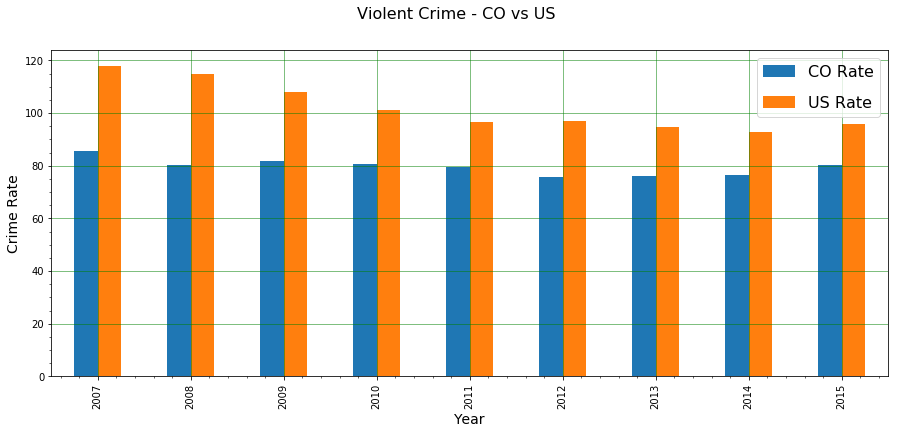

In [85]:
# Setting the positions and width for the bars
# pos = list(range(len(violentcous_df['CO Rate']))) 
# width = 0.25 
    
# Plotting the bars


violentcous_df.plot(kind='bar', figsize=(15,6))
# Turn on the grid
plt.suptitle('Violent Crime - CO vs US',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Crime Rate',size = 14)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.legend(loc = "best", labelspacing = 1, fontsize=16)

plt.savefig('COvsUSviolentcrime')
plt.show()



In [88]:
# create dataframe for property crime
propertyfilter_df = reduced_df.loc[(reduced_df["Which"] == "Property") & (reduced_df["Years"]>2006)] 
propertyco_df = propertyfilter_df.groupby(['Years','Which']).agg({'CO Rate':['mean']})
propertyus_df = propertyfilter_df.groupby(['Years','Which']).agg({'US Rate':['mean']})
propertycous_df = pd.merge(propertyco_df, propertyus_df, on = 'Years')
propertycous_df.columns = ['CO Rate', 'US Rate']
propertycous_df.head()

,CO Rate,US Rate
Years,,
2007,963.866667,1092.133333
2008,879.666667,1071.500000
2009,860.033333,1013.800000
2010,856.733333,981.966667
2011,858.266667,968.466667


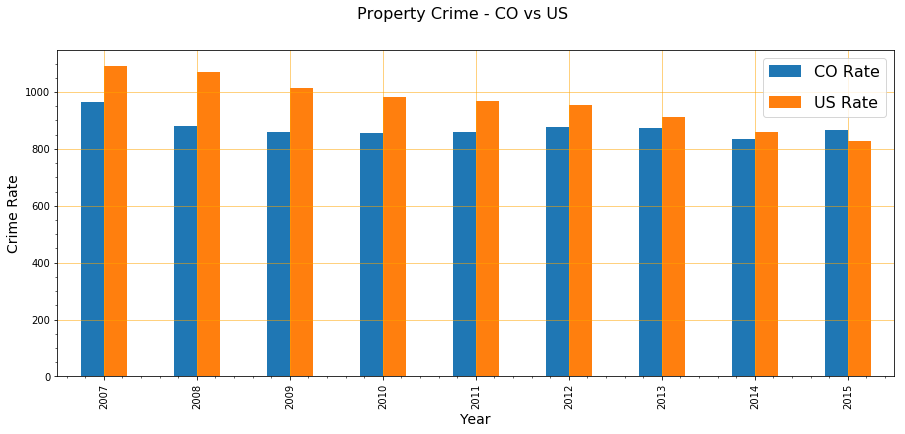

In [87]:
propertycous_df.plot(kind='bar', figsize=(15,6))
# Turn on the grid
plt.suptitle('Property Crime - CO vs US',size = 16)
plt.xlabel('Year',size = 14)
plt.ylabel('Crime Rate',size = 14)
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='orange')
plt.legend(loc = "best", labelspacing = 1, fontsize=16)

plt.savefig('COvsUSpropertycrime')
plt.show()

In [16]:
reduced_df = crime_rates[["Years","Crime", "Which", "CO Rate", "US Rate"]]
reduced_df.head()

reduced_df["Crime"].unique()

plt.savefig('robbery.png')

robbery_df=reduced_df.loc[(reduced_df["Crime"]=="Robbery") & (reduced_df["Years"]>2006) & (reduced_df["Years"]<=2015), :]
robbery_df

,Years,Crime,Which,CO Rate,US Rate
101,2007,Robbery,Violent,69.2,148.3
102,2008,Robbery,Violent,63.6,145.9
103,2009,Robbery,Violent,65.1,133.1
104,2010,Robbery,Violent,60.7,119.3
105,2011,Robbery,Violent,64.7,113.9
106,2012,Robbery,Violent,64.5,113.1
107,2013,Robbery,Violent,59.7,109.0
108,2014,Robbery,Violent,56.7,101.3
109,2015,Robbery,Violent,61.0,101.9


<Figure size 432x288 with 0 Axes>

In [17]:
reduced_df = crime_rates[["Years","Crime", "Which", "CO Rate", "US Rate"]]
reduced_df.head()

reduced_df["Crime"].unique()

plt.savefig('aggravated_assault.png')

aggravated_assault_df=reduced_df.loc[(reduced_df["Crime"]=="Aggravated Assault") & (reduced_df["Years"]>2006) & (reduced_df["Years"]<=2015), :]
aggravated_assault_df

,Years,Crime,Which,CO Rate,US Rate
138,2007,Aggravated Assault,Violent,230.8,287.2
139,2008,Aggravated Assault,Violent,213.5,277.5
140,2009,Aggravated Assault,Violent,217.0,264.7
141,2010,Aggravated Assault,Violent,218.0,252.8
142,2011,Aggravated Assault,Violent,206.5,241.5
143,2012,Aggravated Assault,Violent,195.7,242.8
144,2013,Aggravated Assault,Violent,186.5,229.6
145,2014,Aggravated Assault,Violent,190.9,229.2
146,2015,Aggravated Assault,Violent,196.3,237.8


<Figure size 432x288 with 0 Axes>

In [18]:
reduced_df = crime_rates[["Years","Crime", "Which", "CO Rate", "US Rate"]]
reduced_df.head()

reduced_df["Crime"].unique()

plt.savefig('burgary.png')

burgary_df=reduced_df.loc[(reduced_df["Crime"]=="Burgary") & (reduced_df["Years"]>2006) & (reduced_df["Years"]<=2015), :]
burgary_df

,Years,Crime,Which,CO Rate,US Rate
175,2007,Burgary,Property,572.9,726.1
176,2008,Burgary,Property,530.9,733.0
177,2009,Burgary,Property,504.6,717.7
178,2010,Burgary,Property,499.4,701.0
179,2011,Burgary,Property,499.6,701.3
180,2012,Burgary,Property,494.8,672.2
181,2013,Burgary,Property,469.7,610.5
182,2014,Burgary,Property,432.4,537.2
183,2015,Burgary,Property,428.7,491.4


<Figure size 432x288 with 0 Axes>

In [19]:
reduced_df = crime_rates[["Years","Crime", "Which", "CO Rate", "US Rate"]]
reduced_df.head()

reduced_df["Crime"].unique()

larceny_df=reduced_df.loc[(reduced_df["Crime"]=="Larceny") & (reduced_df["Years"]>2006) & (reduced_df["Years"]<=2015), :]

plt.savefig('larceny.png')

larceny_df

,Years,Crime,Which,CO Rate,US Rate
212,2007,Larceny,Property,1985.5,2185.4
213,2008,Larceny,Property,1853.8,2166.1
214,2009,Larceny,Property,1835.8,2064.5
215,2010,Larceny,Property,1855.4,2005.8
216,2011,Larceny,Property,1861.5,1974.1
217,2012,Larceny,Property,1905.2,1965.4
218,2013,Larceny,Property,1917.5,1901.9
219,2014,Larceny,Property,1837.7,1821.5
220,2015,Larceny,Property,1880.7,1775.4


<Figure size 432x288 with 0 Axes>

,Years,Crime,Which,CO Rate,US Rate
249,2007,Motor Vehicle Theft,Property,333.2,364.9
250,2008,Motor Vehicle Theft,Property,254.3,315.4
251,2009,Motor Vehicle Theft,Property,239.7,259.2
252,2010,Motor Vehicle Theft,Property,215.4,239.1
253,2011,Motor Vehicle Theft,Property,213.7,230.0
254,2012,Motor Vehicle Theft,Property,230.2,230.4
255,2013,Motor Vehicle Theft,Property,235.1,221.3
256,2014,Motor Vehicle Theft,Property,233.2,215.4
257,2015,Motor Vehicle Theft,Property,292.7,220.2


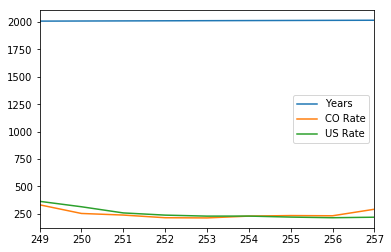

In [20]:
reduced_df = crime_rates[["Years","Crime", "Which", "CO Rate", "US Rate"]]
reduced_df.head()

reduced_df["Crime"].unique()

motor_vehicle_theft_df=reduced_df.loc[(reduced_df["Crime"]=="Motor Vehicle Theft") & (reduced_df["Years"]>2006) & (reduced_df["Years"]<=2015), :]
motor_vehicle_theft_df.plot()
plt.savefig('motor_vehicle_theft.png')

motor_vehicle_theft_df